# Data Analysis of meteorological data

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("weatherHistory.csv")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset.head()
# displays the first five rows of dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [9]:
dataset.isnull().sum()
# return the number of mssing values in dataset

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
dataset.info()
# prints the information or summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [11]:
dataset['Formatted Date']= pd.to_datetime(dataset['Formatted Date'] , utc=True)
# Pandas to_datetime() method helps to convert string Date time into Python Date time object.

In [13]:
dataset['Formatted Date']

# UTC FORMAT: What is UTC format?
# Times are expressed in UTC (Coordinated Universal Time), with a special UTC designator ("Z"). Times are expressed in local time, together with a time zone offset in hours and minutes. A time zone offset of "+hh:mm" indicates that the date/time uses a local time zone which is "hh" hours and "mm" minutes ahead of UTC

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [32]:
dataset=dataset.set_index('Formatted Date')
# Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.
dataset.head()

KeyError: "None of ['Formatted Date'] are in the columns"

In [21]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = dataset[data_columns].resample('MS').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


In [22]:
df_monthly_mean

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


In [23]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)

df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

<AxesSubplot:title={'center':'Variation in Apparent Temprature vs Humidity'}, xlabel='Formatted Date'>

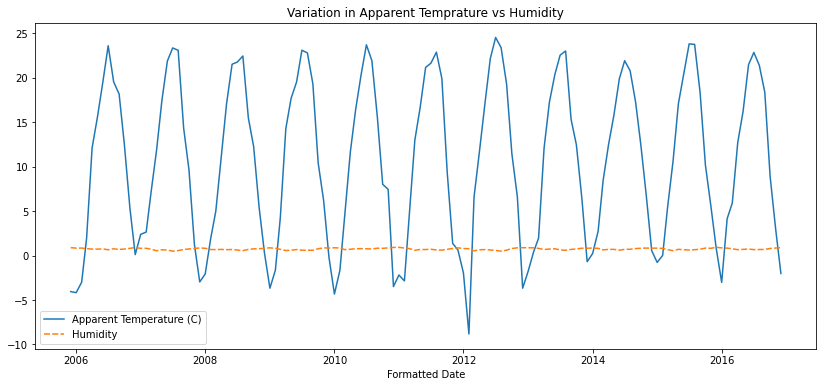

In [24]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temprature vs Humidity")
sns.lineplot(data=df_monthly_mean)

Text(0.5, 0, 'Month of April')

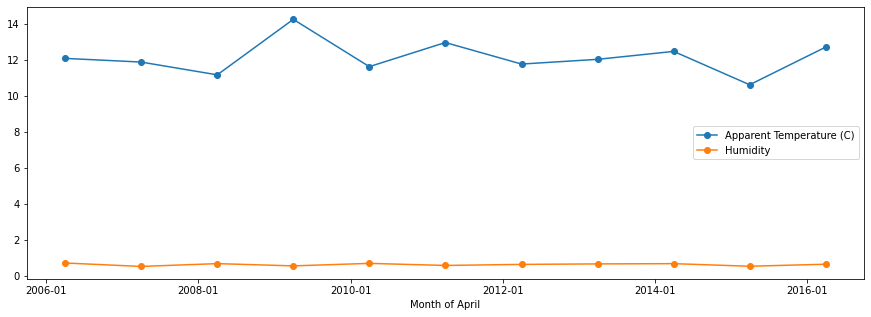

In [25]:
import matplotlib.dates as mdates
from datetime import datetime 

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

In [28]:
dataset=dataset.resample('MS').mean()
apt=dataset['Apparent Temperature (C)']
hmd=dataset['Humidity']

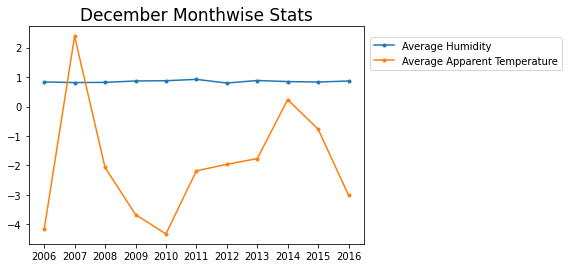

In [30]:
df1 = dataset[dataset.index.month==1]
hdt=df1['Humidity']
atm=df1['Apparent Temperature (C)']
plt.title("December Monthwise Stats",fontsize=17)
plt.plot(hdt,label="Average Humidity",marker=".")
plt.plot(atm,label="Average Apparent Temperature",marker='.')
plt.legend(loc=(1.02,0.8))
plt.show()

In [33]:
# This graph shows the daywise apparent temperature from 2006 to 2016
# Like this we can calculate for remaining months also.